**TEXTBOOK 6.7 EXAMPLE**

In [1]:
import numpy as np
import gurobipy as gp; gp.Model()

from src.input import Input_uc
from src.output import Output_uc
from src.unit_commitment import solve_uc_formulation_0

Set parameter Username
Set parameter LicenseID to value 2659802
Academic license - for non-commercial use only - expires 2026-05-01


In [2]:
num_units = 4
num_periods = 720 - 300 + 1

input_uc = Input_uc(
    example_1=True,
    num_units=num_units,
    num_periods=num_periods,
    #########################
    demand=np.arange(300, 720 + 1),
    reserve=np.full((num_periods), 250), 
    renewable=np.zeros(num_periods),
    #########################
    p_min=np.zeros(num_units),
    p_max=np.array([250, 230, 240, 250]),
    ramp_up=np.full((num_units), 250),
    ramp_down=np.full((num_units), 250),
    startup_ramp=np.full((num_units), 250),
    shutdown_ramp=np.full((num_units), 250),
    min_up=np.ones(num_units, dtype=np.int64),
    min_down=np.ones(num_units, dtype=np.int64),
    #########################
    cost_lin=np.array([2, 17, 20, 28]),
    cost_const=np.zeros(num_units),
    #########################
    cost_startup_step=np.array([[0], [0], [0], [0]]),
    num_cooling_steps=np.array([1, 1, 1, 1]),
    #########################
    u_prev=np.array([[0], [0], [0], [0]]), 
    p_prev=np.array([0, 0, 0, 0]),
    min_up_prev=np.array([0, 0, 0, 0]), 
    min_down_prev=np.array([0, 0, 0, 0]), 
)

In [3]:
output_uc = Output_uc()
solve_uc_formulation_0(input_uc=input_uc, output_uc=output_uc)

In [4]:
import matplotlib.pyplot as plt

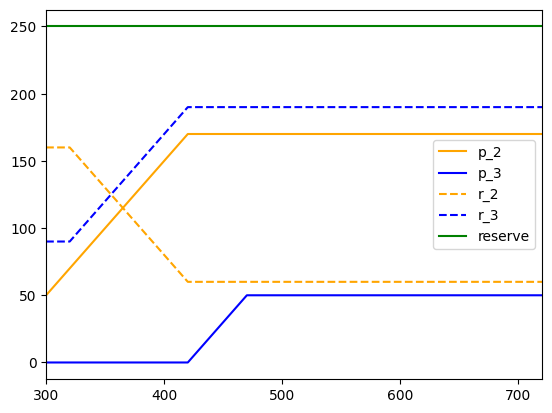

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(output_uc.p[1, :], c="orange", label="p_2")
ax.plot(output_uc.p[2, :], c="blue", label="p_3")
ax.plot(output_uc.r[1, :], c="orange", ls="--", label="r_2")
ax.plot(output_uc.r[2, :], c="blue", ls="--", label="r_3")
ax.plot(output_uc.r.sum(axis=0), label="reserve", c="green")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels=(np.array(ax.get_xticks()) + 300).astype(int))
ax.set_xlim(0, 420)
ax.legend()
plt.show(ax)

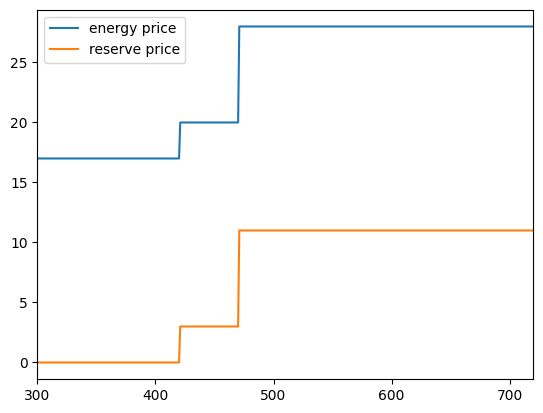

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(output_uc.marginal_price_generation, label="energy price")
ax.plot(output_uc.marginal_price_reserve, label="reserve price")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels=(np.array(ax.get_xticks()) + 300).astype(int))
ax.set_xlim(0, 420)
ax.legend()
plt.show(ax)